# Carga de datos con pd.read


In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/titanic/titanic3.csv"
data = pd.read_csv(url)

### ejemplo uso read.csv
read.csv(filepath="/Users/gonza/Downloads/..", sep=",",dtype={"Ingresos":np.float64,"edad":np.int32},header=0,
        names={"ingresos","edad"},skiprows=12,index_col=None, skip_blank_lines=False,na_filter=False)

In [2]:
# correlacion entre variables
import pandas as pd
url2 = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv"
data_ads = pd.read_csv(url2)
data_ads.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [8]:
# ver coorelacion entre publicidad y ventas
data_ads.corr()[["Sales"]].abs().sort_values(by="Sales", ascending=False)[1:].style.background_gradient(cmap='Oranges')

,Sales
TV,0.782224
Radio,0.576223
corr2,0.322686
Newspaper,0.228299
corr1,0.146003
corrn,0.0961527


In [4]:
    # hacemos la correlacion manual, creando una columna
    import numpy as np
    data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [5]:
data_ads.head(3)

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206


In [6]:
data_ads["corr1"] =   (data_ads["TV"] - np.mean(data_ads["TV"]))**2
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2
data_ads.head(3)

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006


In [7]:
coef_pearson = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"])) 
coef_pearson

0.782224424861606

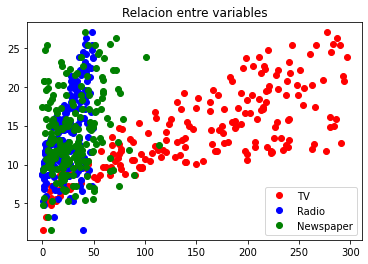

In [11]:
import matplotlib.pyplot as plt
plt.plot(data_ads["TV"],data_ads["Sales"],"ro", label="TV")
plt.plot(data_ads["Radio"],data_ads["Sales"],"bo",label="Radio")
plt.plot(data_ads["Newspaper"],data_ads["Sales"],"go",label="Newspaper")
plt.title("Relacion entre variables")
plt.legend()

In [13]:
data_ads.corr().abs().sort_values(by="Sales", ascending=False)[1:].style.background_gradient(cmap='RdPu')

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
TV,1,0.0548087,0.0566479,0.782224,0.129791,0.0787974,0.0759153
Radio,0.0548087,1,0.354104,0.576223,0.333135,0.0968838,0.402556
corr2,0.0759153,0.402556,0.142256,0.322686,0.894818,0.53624,1
Newspaper,0.0566479,0.354104,1,0.228299,0.124422,0.081003,0.142256
corr1,0.0787974,0.0968838,0.081003,0.146003,0.744287,1,0.53624
corrn,0.129791,0.333135,0.124422,0.0961527,1,0.744287,0.894818


# modelo regresion lineal
## modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuidos segun una N(1.5,2.5)
* Ye = 5 + 1.9 * x + e
* estara distribuido segun N(0, 0.8)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred = 5 + 1.9 * x
y_act = 5 + 1.9 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
dato = pd.DataFrame(
    {"x": x_list,
    "y_act": y_act_list,
    "y_pred" : y_pred_list,
    }
)

In [8]:
dato.head()

,x,y_act,y_pred
0,5.751428,17.727290,15.927713
1,4.297472,15.049283,13.165196
2,3.902894,12.522979,12.415498
3,1.520428,7.300205,7.888813
4,6.792750,18.589329,17.906224


Text(0.5, 1.0, 'Valor actualr vs prediccion')

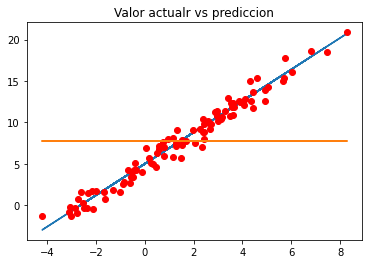

In [9]:
# pintamos los datos junto con la media
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]
plt.plot(x, y_pred)
plt.plot(x, y_act,"ro")
plt.plot(x, y_mean,linestyle="-")
plt.title("Valor actualr vs prediccion")

In [12]:
# calculamos la summa de los errores cuadrado a la recta , a la media y los totales SST = SSR + SSD // R2 = SSR/SST (cuando mas cerca de uno mejor, pero solo es un indicador, hay que ver otros para confirmar que el modelo esta bien)
dato["SSR"] = (dato["y_pred"] - np.mean(dato["y_act"]))**2
dato["SSD"] = (dato["y_pred"] - dato["y_act"])**2
dato["SST"] = (dato["y_act"] - np.mean(dato["y_act"]))**2

In [13]:
dato.head()

,x,y_act,y_pred,SSR,SSD,SST
0,5.751428,17.727290,15.927713,66.652982,3.238479,99.275421
1,4.297472,15.049283,13.165196,29.177402,3.549782,53.081391
2,3.902894,12.522979,12.415498,21.640290,0.011552,22.651835
3,1.520428,7.300205,7.888813,0.015682,0.346459,0.214721
4,6.792750,18.589329,17.906224,102.873128,0.466633,117.196739


In [15]:
SSR=sum(dato["SSR"])
SSD=sum(dato["SSD"])
SST=sum(dato["SST"])

In [16]:
display("SSR=",SSR,
        "SSD=", SSD,
        "SST=", SST)

'SSR='

2589.8238075307368

'SSD='

79.93846366420934

'SST='

2631.1927407921708

In [17]:
R2 = SSR/SST
R2

0.9842774979498541

(array([ 8.,  3., 13., 13., 18., 24., 11.,  5.,  3.,  2.]),
 array([-1.88408664, -1.45223156, -1.02037649, -0.58852141, -0.15666633,
         0.27518874,  0.70704382,  1.1388989 ,  1.57075397,  2.00260905,
         2.43446412]),
 <a list of 10 Patch objects>)

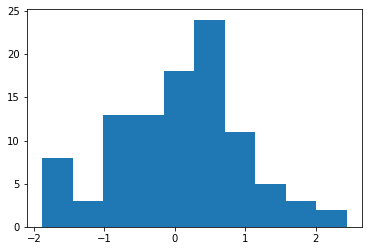

In [24]:
# la ssd( suma cuadrado diferencias) tiene una distribucion  normal
plt.hist((dato["y_pred"]-dato["y_act"]))

### Como es la prediccion de buena ?
* SST = SSD + SSR
* SST : variabilidad de los datos con respecto a la media
* SSD : diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar(erroreres que deberian sequir una distribucion normal)
* SSR : diferencia entre la regresion y el valor medio del modelo que queremos buscar
* R2 = SSR/SST, coeficiente de determinacion entre 1 y 0

### Regresion lineal simple en python
El paquete statsmodel para regresion lineal

In [3]:
url3 = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv"
dat = pd.read_csv(url3)
dat.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [4]:
import statsmodels.formula.api as smf

In [5]:
lm = smf.ols(formula="Sales~TV", data=dat).fit()

In [6]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

el modelo lineal predictivo seria
sales = 7.032594 + 0.047537*TV

In [7]:
# podemos preguntar cuales son los p valores al modelo
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [8]:
#R2
lm.rsquared

0.611875050850071

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           1.47e-42
Time:                        18:56:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# prediccion ( recordar que solo estamos usando una variable)
sales_pred = lm.predict(pd.DataFrame(dat["TV"]))
sales_pred 


0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

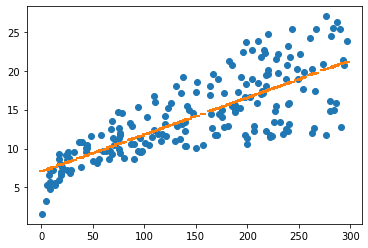

In [17]:
plt.scatter(x="TV",y="Sales",data=dat)
plt.scatter(x=dat["TV"],y=sales_pred, marker="_",linewidth=2)

In [20]:
dat["sales_pred"] = 7.032594 + 0.047537*dat["TV"]

el error estandar residual (RSE), la raiz cuadrada de la media de la suma de los residuos al cuadrado, nos dara una estimcoin sobre la desviacion promedo de cualquier punto respecto a la verdadera recta de regresion

In [22]:
dat["RSE"] = (dat["Sales"] - dat["sales_pred"])**2
SSD = sum(dat["RSE"])
RSE = np.sqrt(SSD/(len(dat)-2))

In [26]:
display(f"El error estandar residual es: {RSE}")

'El error estandar residual es: 3.258656369238098'

In [28]:
# La media de venta (sales_m), y sacamos la parte del modelo que no puede ser explicada (error)
sales_m = np.mean(dat["Sales"])
error = RSE/sales_m
print(f"la parte del modelo que no puede ser explicada es un {round(error*100,2)} por ciento")

la parte del modelo que no puede ser explicada es un 23.24 por ciento
